In [1]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import os
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
import sys
import importlib
import pingouin as pg
import pandas as pd
import analysis_utilities as au
from itertools import combinations

'''
Using function now instead of writing things over and over again 
'''

'\nUsing function now instead of writing things over and over again \n'

In [2]:
sys.path.insert(0,r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement')
import plot_functions 
import Subject_Object_v2
importlib.reload(Subject_Object_v2)
importlib.reload(plot_functions)
import plot_functions as pf
import read_data_functions as rdf
import Statistics_Object
importlib.reload(Statistics_Object)


<module 'Statistics_Object' from 'D:\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\Statistics_Object.py'>

## Initial Thangs

In [3]:
experiment = 'Exp2'

In [4]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir(f'D:\OneDrive - University of Delaware - o365\Subject_Data\MatchPennies_Agent_{experiment}')
PATH = os.getcwd()
SAVE_PATH = f'C:\\Users\\Seth Sullivan\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\Group_Figures\\{experiment}\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)

if experiment == 'Exp1':
    tp3_title = "1000 [50]"
    tp4_title = "1000 [150]"
    tp5_title = '1100 [50]'
    tp6_title = "1100 [150]"
    tp7_title = "1200 [50]"
    tp8_title = '1200 [150]'
    trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]
    xlabel = 'Agent Mean [SD] Movement\nOnset Time (ms)'
    num_blocks = len(trial_block_titles)
    num_trials = 80
    num_rows,num_cols = 2,3
    condition_nums = ['0','1','2','3','4','5']
    f1_xlabel = 'Agent Mean Movement Onset Time (ms)'
    f2_xlabel = 'Agent SD Movement Onset Time (ms)'
    f1_collapse_xticklabs = ['1000','1100','1200']
    f2_collapse_xticklabs = ['50','150']
    
if experiment == 'Exp2':
    tp3_title = "Win = 1\nIncorrect = 0\nIndecision = 0"
    tp4_title = "Win = 1\nIncorrect = -1\nIndecision = 0"
    tp5_title = "Win = 1\nIncorrect = 0\nIndecision = -1"
    tp6_title = "Win = 1\nIncorrect = -1\nIndecision = -1"
    trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title]
    num_blocks = len(trial_block_titles)
    xlabel = 'Feedback Condition'
    condition_nums = ['0','1','2','3']

    num_trials = 80
    num_rows,num_cols = 2,2
    f1_xlabel = 'Incorrect Reward'
    f2_xlabel = 'Indecision Reward'
    f1_collapse_xticklabs = ['0 Incorrect','-1 Incorrect']
    f2_collapse_xticklabs = ['0 Indecision','-1 Indecision']
    


## Pickle Objects

In [5]:
os.getcwd()

'D:\\OneDrive - University of Delaware - o365\\Subject_Data\\MatchPennies_Agent_Exp2'

In [6]:
if 'subject_objects' not in locals():
    load_path = r'Subjects_Analyzed'
    subject_objects = rdf.generate_subject_objects(experiment)
    # pos_group = Subject_Object_v2.Group(subject_objects, select_trials = 'All Trials', num_stds_for_reaction_time = 2, 
    #                                     task_leave_time_metric_name = 'player_pos_task_leave_time', task_movement_time_metric_name = 'player_pos_task_movement_time',
    #                                     reaction_time_metric_name = 'player_pos_reaction_time', reaction_movement_time_metric_name = 'player_pos_reaction_movement_time')
    # pos_group.analyze_data()
    # vel_group_linear = Subject_Object_v2.Group(subject_objects, select_trials = 'All Trials', num_stds_for_reaction_time = 2, 
    #                                     task_leave_time_metric_name = 'player_velocity_task_leave_time_linear',task_movement_time_metric_name = 'player_velocity_task_movement_time_linear',
    #                                     reaction_time_metric_name = 'player_velocity_reaction_time_linear', reaction_movement_time_metric_name = 'player_velocity_reaction_movement_time_linear')
    # vel_group_linear.analyze_data()

    group = Subject_Object_v2.Group(subject_objects, select_trials = 'All Trials', num_stds_for_reaction_time = 2, 
                                        task_leave_time_metric_name = 'player_velocity_task_leave_time_thresh',task_movement_time_metric_name = 'player_velocity_task_movement_time_thresh',
                                        reaction_time_metric_name = 'player_velocity_reaction_time_thresh', reaction_movement_time_metric_name = 'player_velocity_reaction_movement_time_thresh')
    group.analyze_data()

Sub1
Sub2
Sub4
Sub5
Sub6
Sub7
Sub8
Sub9
Sub10
Sub11
Sub12
Sub13
Sub14
Sub15
Sub16
Sub17


D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:501: RuntimeWarning: All-NaN slice encountered
  self.init_reach_posx_single_timepoint = np.nanmax(self.init_reach_posx*self.init_reach_pos_mask,axis=2)
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:566: RuntimeWarning: divide by zero encountered in divide
  self.mu_s = (self.phat_correct*self.mhat_correct - self.phat_error*self.mhat_error)/(self.phat_correct - self.phat_error)
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:577: RuntimeWarning: divide by zero encountered in divide
  self.mu_s_alternate = (self.phat_correct*self.mhat_correct_alternate - self.phat_error*self.mhat_error_alternate)/(self.phat_correct - self.phat_error)


## Set Save to True or False

In [8]:
save = False

## Create DataFrame for Pingouin

In [9]:
wins = group.player_perc_wins.flatten().tolist()
indecisions = group.player_perc_indecisions.flatten().tolist()
incorrects = group.player_perc_incorrects.flatten().tolist()
correct_decisions = np.array(group.phat_correct*100).flatten().tolist()
median_leave_time = np.nanmedian(group.player_task_leave_time,axis=2).flatten().tolist()
q1_median_leave_time = np.nanquantile(group.player_task_leave_time,0.25,axis=2).flatten().tolist()
q3_median_leave_time = np.nanquantile(group.player_task_leave_time,0.75,axis=2).flatten().tolist()
leave_time_sd = np.nanstd(group.player_task_leave_time,axis=2).flatten().tolist()
gamble_leave_time = np.nanmedian(group.player_gamble_task_leave_time,axis=2).flatten().tolist()
subject_number = np.repeat(np.arange(1,num_subjects+1,1,dtype=int),num_blocks).tolist()
condition = np.tile(np.arange(1,num_blocks+1,1,dtype=int),num_subjects).tolist()
# alt_condition = np.tile(['1000 (50)','1000 (150)','1100 (50)','1100 (150)', '1200 (50)', '1200 (150)'],num_subjects).tolist()
if experiment == 'Exp1':
    factor1 = np.tile(['1000','1000','1100','1100','1200','1200'],num_subjects) 
    factor2 = np.tile(['50','150'],num_subjects*3)
    
else:
    factor1 = np.tile(['0 Inc','-1 Inc','0 Inc','-1 Inc'],num_subjects) 
    factor2 = np.tile(['0 Ind','0 Ind','-1 Ind','-1 Ind'],num_subjects) 

    
df_metrics = pd.DataFrame(np.array([median_leave_time,wins,indecisions,incorrects,correct_decisions,gamble_leave_time,leave_time_sd,
                                    q1_median_leave_time,q3_median_leave_time]).T,
                        columns=['Median Leave Time','Wins','Indecisions','Incorrects','Correct Decisions','Median Gamble Leave Time','SD Leave Time',
                                 'Q1 Leave Time','Q3 Leave Time'])
df_conditions = pd.DataFrame(np.array([subject_number,condition,factor1,factor2]).T,columns = ['Subject','Condition','Factor 1','Factor 2'])
# df_metrics.astype('float64')

# df = df.astype({'Subject':'int32','Condition':'int32','Condition Mean':'int32','Condition SD':'int32'})
# dill.dump(df,open(save_path+'\\metrics_df_all_subjects.pkl','wb')) 
df = pd.concat([df_conditions,df_metrics],axis=1)
assert ~df.isnull().any(axis=1).any(),('NaN Values found in dataframe')
df.head(10)

,Subject,Condition,Factor 1,Factor 2,Median Leave Time,Wins,Indecisions,Incorrects,Correct Decisions,Median Gamble Leave Time,SD Leave Time,Q1 Leave Time,Q3 Leave Time
0,1,1,0 Inc,0 Ind,1344.0,60.00,40.00,0.00,91.25,1254.5,61.514993,1310.75,1373.50
1,1,2,-1 Inc,0 Ind,1352.5,57.50,41.25,1.25,90.00,1302.0,123.192329,1311.50,1387.00
2,1,3,0 Inc,-1 Ind,1225.0,62.50,3.75,33.75,67.50,1191.0,143.627711,1147.50,1295.25
3,1,4,-1 Inc,-1 Ind,1308.5,75.00,16.25,8.75,78.75,1228.5,75.874064,1266.25,1348.25
4,2,1,0 Inc,0 Ind,1287.0,26.25,56.25,17.50,72.50,1160.5,149.903932,1163.00,1357.00
5,2,2,-1 Inc,0 Ind,1240.0,23.75,56.25,20.00,58.75,1032.0,230.909710,1007.00,1339.50
6,2,3,0 Inc,-1 Ind,1101.0,38.75,28.75,32.50,55.00,875.5,283.157728,817.25,1298.25
7,2,4,-1 Inc,-1 Ind,1226.0,30.00,37.50,32.50,55.00,1101.0,167.895290,1075.00,1317.00
8,3,1,0 Inc,0 Ind,1317.0,48.75,35.00,16.25,71.25,1271.0,69.298737,1274.00,1347.25
9,3,2,-1 Inc,0 Ind,1330.0,53.75,43.75,2.50,83.75,1284.0,60.634638,1297.25,1375.00


## Initialize bootstrap

In [10]:
so = Statistics_Object.Statistics(df, experiment = experiment, num_subjects=num_subjects,num_blocks=num_blocks,num_trials=num_trials,trial_block_titles=trial_block_titles,
                                  xlab =xlabel, f1_xticklabels=f1_collapse_xticklabs,f2_xticklabels=f2_collapse_xticklabs,f1_xlabel=f1_xlabel,f2_xlabel=f2_xlabel)

In [11]:
_,b = so.run_statistics('Median Leave Time',M=1e4)

Non-significant interaction, collapsing across conditions...


## Median Leave Times

In [12]:
median_leave_time_anova,median_leave_time_statistics = so.run_statistics('Median Leave Time',M=1e5)
median_leave_time_anova

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,64516.000000,1,15,64516.000000,11.040014,0.004638,0.004638,0.068490,1.0
1,Factor 2,31196.390625,1,15,31196.390625,8.249833,0.011631,0.011631,0.034333,1.0
2,Factor 1 * Factor 2,2835.562500,1,15,2835.562500,1.328986,0.267027,0.267027,0.003221,1.0


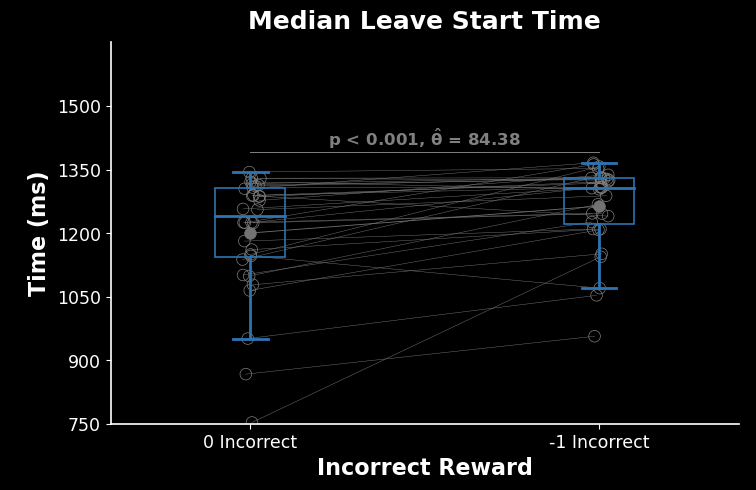

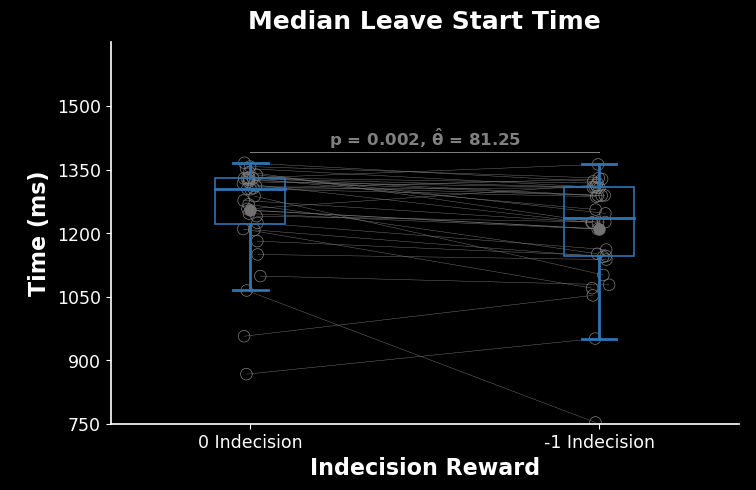

In [13]:
so.plot(median_leave_time_statistics,'Median Leave Time',title='Median Leave Start Time',
                    ylab='Time (ms)',ylocs=np.arange(750,1650,150),lims=True)

## SD Leave Times

In [14]:
sd_leave_time_anova,sd_leave_time_statistics = so.run_statistics('SD Leave Time')
sd_leave_time_anova

Significant interaction, doing pairwise bootstraps for each condition...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,4320.255361,1,15,4320.255361,4.800814,0.044649,0.044649,1.734908e-02,1.0
1,Factor 2,0.133548,1,15,0.133548,0.000093,0.992426,0.992426,5.457643e-07,1.0
2,Factor 1 * Factor 2,6680.122741,1,15,6680.122741,5.007268,0.040842,0.040842,2.657390e-02,1.0


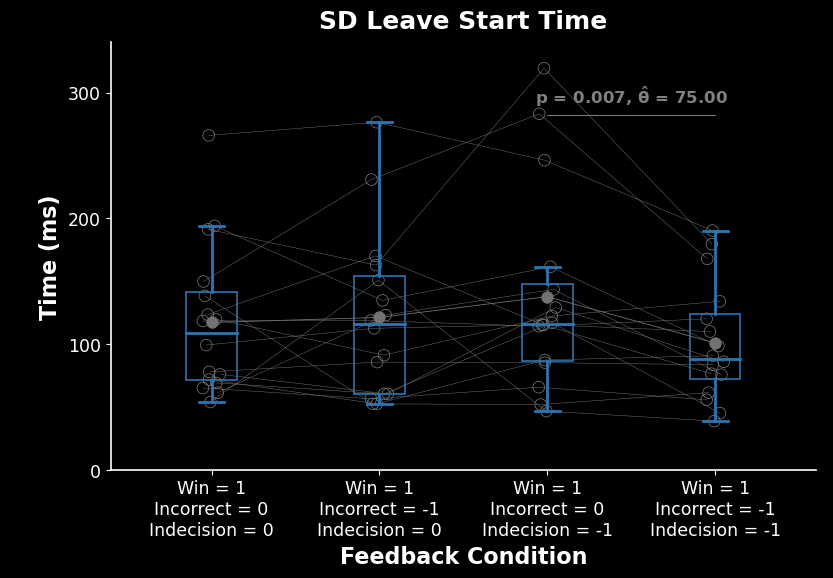

In [15]:
so.plot(sd_leave_time_statistics,'SD Leave Time',title='SD Leave Start Time',
                    ylab='Time (ms)',ylocs=np.arange(0,400,100),lims=True,cut_pvals=True)

## First Quartile Leave Time

In [16]:
q1_leave_time_anova,q1_leave_time_statistics = so.run_statistics('Q1 Leave Time')
q1_leave_time_anova

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,102680.191406,1,15,102680.191406,11.935591,0.003537,0.003537,0.055289,1.0
1,Factor 2,44573.765625,1,15,44573.765625,4.820525,0.044268,0.044268,0.024777,1.0
2,Factor 1 * Factor 2,13938.753906,1,15,13938.753906,2.597378,0.127878,0.127878,0.007882,1.0


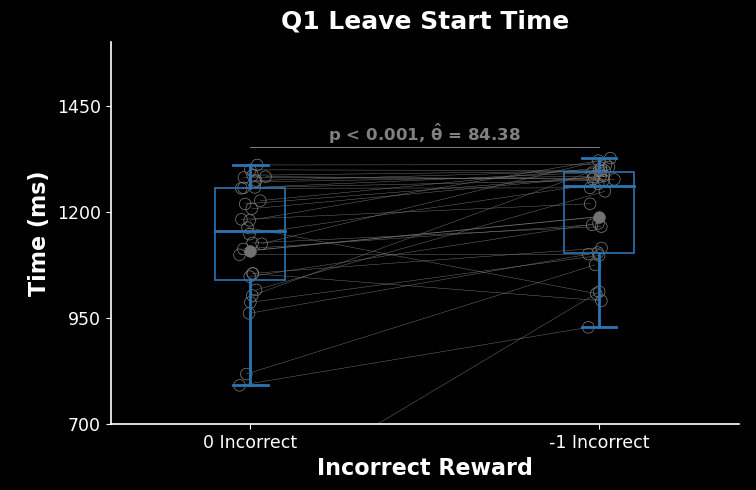

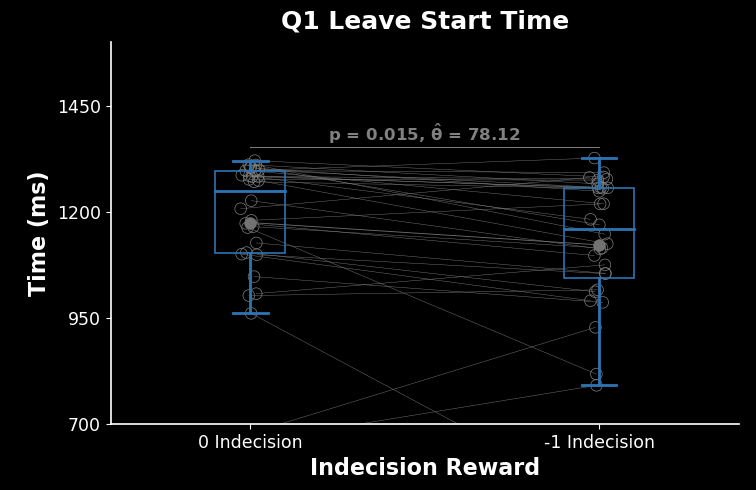

In [17]:

so.plot(q1_leave_time_statistics,'Q1 Leave Time',title='Q1 Leave Start Time',
                    ylab='Time (ms)',ylocs=np.arange(700,1600,250),lims=True)

## Third Quartile Leave Time

In [18]:
q3_leave_time_anova,q3_leave_time_statistics = so.run_statistics('Q3 Leave Time')
q3_leave_time_anova

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,30297.753906,1,15,30297.753906,6.564945,0.021667,0.021667,0.056626,1.0
1,Factor 2,18940.640625,1,15,18940.640625,10.277111,0.005894,0.005894,0.036167,1.0
2,Factor 1 * Factor 2,90.250000,1,15,90.250000,0.103012,0.752673,0.752673,0.000179,1.0


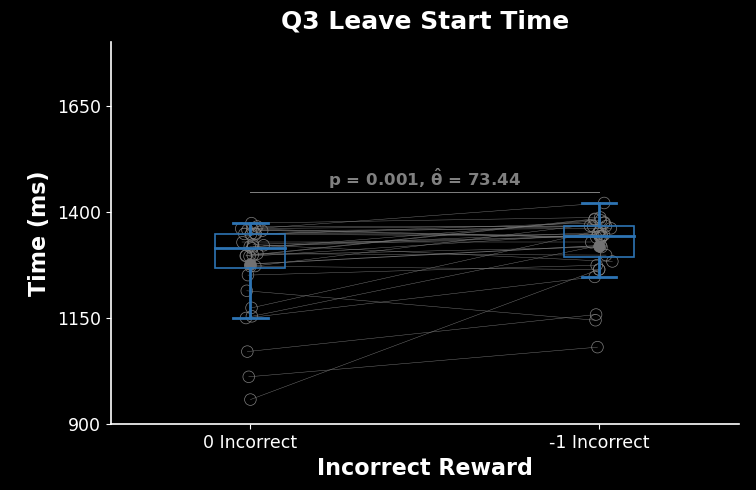

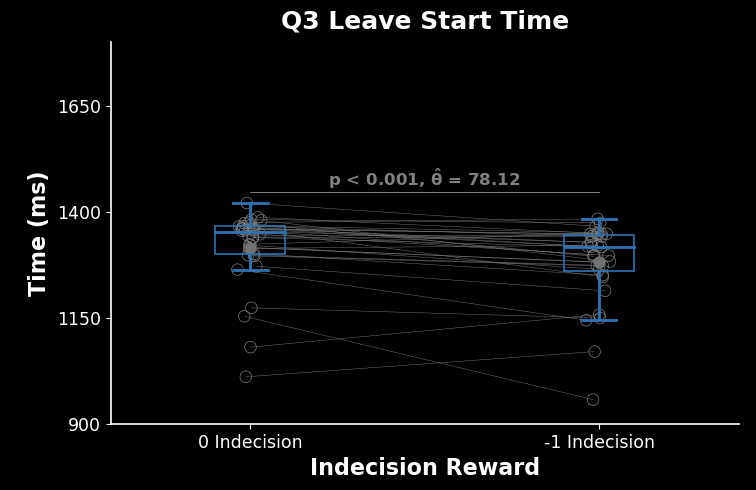

In [19]:
metric = np.quantile(group.player_task_leave_time,0.75,axis=2)

so.plot(q3_leave_time_statistics,'Q3 Leave Time',title='Q3 Leave Start Time',
                    ylab='Time (ms)',ylocs=np.arange(900,1700,250),lims=True)

## Correct Decisions (Doesn't matter if indecision)

In [20]:
corrects_anova,corrects_statistics = so.run_statistics('Correct Decisions')
corrects_anova

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,791.015625,1,15,791.015625,10.737010,0.005096,0.005096,0.070534,1.0
1,Factor 2,672.753906,1,15,672.753906,5.914659,0.028013,0.028013,0.060628,1.0
2,Factor 1 * Factor 2,21.972656,1,15,21.972656,0.399929,0.536647,0.536647,0.002104,1.0


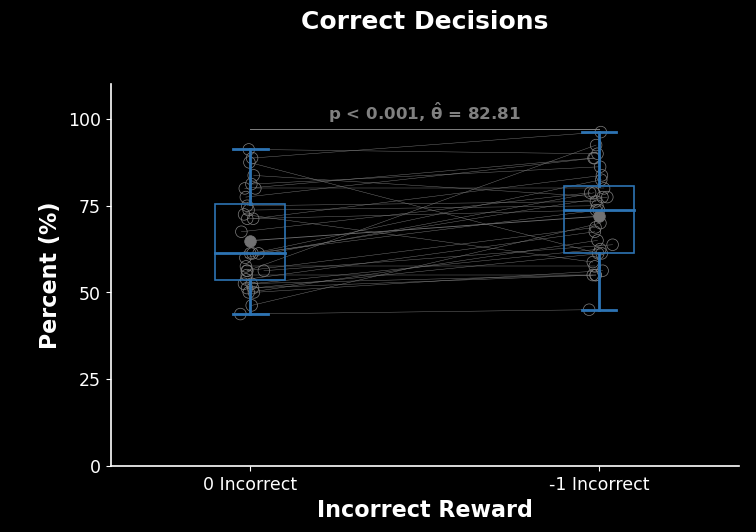

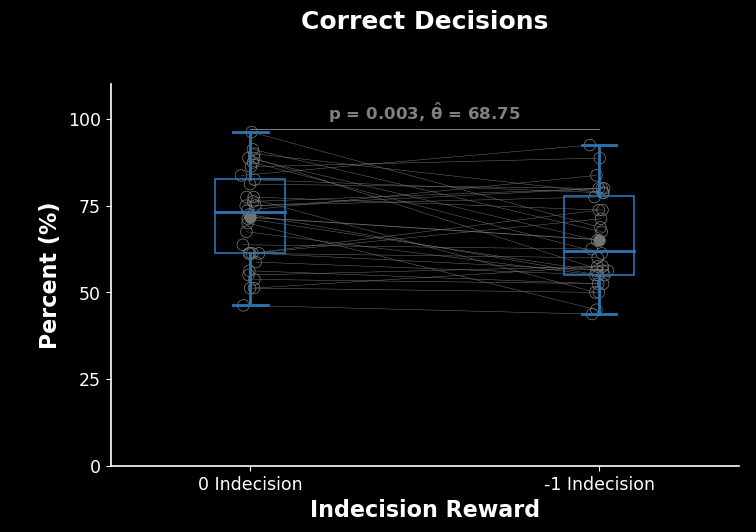

In [21]:

so.plot(corrects_statistics,'Correct Decisions',title='Correct Decisions',
                    ylab='Percent (%)',ylocs=np.arange(0,125,25),lims=True,title_pad=40,h=1)

## Wins

In [22]:
wins_anova,wins_statistics = so.run_statistics('Wins')
wins_anova

Non-significant interaction, collapsing across conditions...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,7.910156,1,15,7.910156,0.210974,0.652591,0.652591,0.000589,1.0
1,Factor 2,339.941406,1,15,339.941406,6.129241,0.025707,0.025707,0.024705,1.0
2,Factor 1 * Factor 2,133.691406,1,15,133.691406,2.590513,0.128345,0.128345,0.009864,1.0


In [23]:
so.plot(wins_statistics,'Wins',title='Wins',
                ylab='Percent (%)',ylocs=np.arange(0,125,25),lims=True,title_pad=40,h=1,select_conditions='f2')

AssertionError: 

## Incorrects

In [ ]:
incorrects_anova,incorrects_statistics = so.run_statistics('Incorrects')
incorrects_anova

Significant interaction, doing pairwise bootstraps for each condition...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,5953.854167,2,38,2976.927083,29.795407,1.648612e-08,1.588739e-07,0.246655,0.847537
1,Factor 2,157.552083,1,19,157.552083,2.522493,1.287353e-01,1.287353e-01,0.008590,1.000000
2,Factor 1 * Factor 2,556.354167,2,38,278.177083,3.722088,3.340427e-02,4.280908e-02,0.029687,0.829146


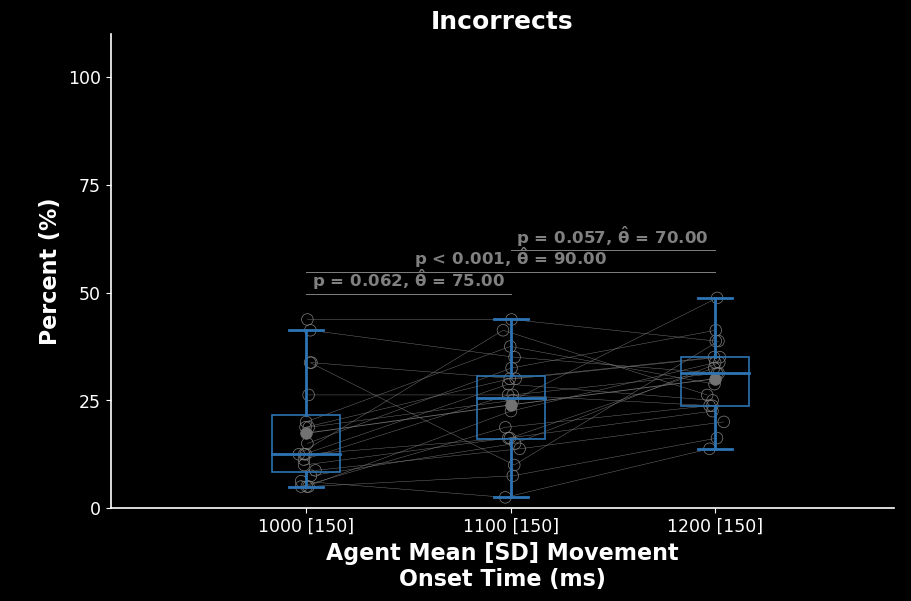

In [ ]:
so.plot(incorrects_statistics,'Incorrects',title='Incorrects',
                ylab='Percent (%)',ylocs=np.arange(0,125,25),lims=True,title_pad=0,h=0.5,select_conditions='f2',
                cut_pvals = False)

## Indecisions

In [ ]:
indecisions_anova,indecisions_statistics = so.run_statistics('Indecisions')
indecisions_anova

Significant interaction, doing pairwise bootstraps for each condition...


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor 1,2481.432292,2,38,1240.716146,10.003995,0.000323,0.000528,0.111388,0.910429
1,Factor 2,132.825521,1,19,132.825521,1.017642,0.325754,0.325754,0.006665,1.000000
2,Factor 1 * Factor 2,1216.432292,2,38,608.216146,5.577994,0.007515,0.013381,0.057891,0.785547


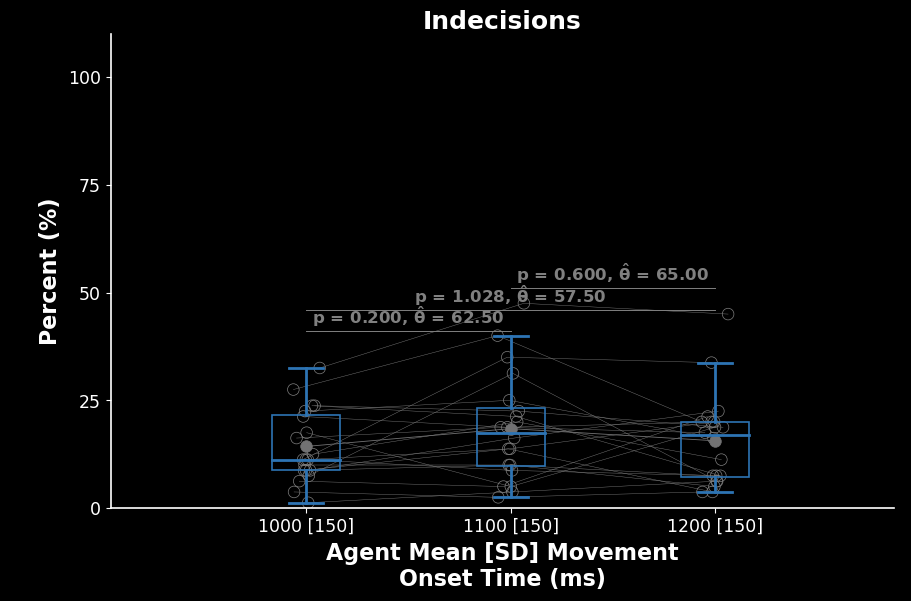

In [ ]:
so.plot(indecisions_statistics,'Indecisions',title='Indecisions',
                ylab='Percent (%)',ylocs=np.arange(0,125,25),lims=True,title_pad=0,h=0.5,select_conditions='f2',
                cut_pvals = False)